# Wstęp do programowania
## Lista 5

Uzupełnij swoje dane poniżej, następnie przeczytaj treść zadań i umieść rozwiązania w odpowidenich komórkach pozostawionych w tym celu pod treścią. Pamiętaj dbać o specyfikację, czyli nazwy zmiennych oraz odpowiednie rozmieszczenie komórek. Jeśli uruchomisz wszystkie komórki, dokument powinien działać bez błędów.

  * **Imię:** x
  * **Nazwisko:** x
  * **Numer indeksu:** x

W rozwiązaniach zadań możesz korzystać z bibliotek `math`, `numpy` oraz `matplotlib.pyplot`.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1

Przypomnij sobie zadanie o hiperkulach (zadanie 6 z listy 4).

Zilustruj objętości $n$-wymiarowych hiperkul o promieniu $r=1$ na wykresie. Pamiętaj, aby był to wykres punktowy (określony tylko dla liczb naturalnych - sprawdź w dokumentacji lub galerii, jakich opcji funkcji `plot` potrzebujesz). Punkt odpowiadający wartości maksymalnej zaznacz innym kolorem niż pozostałe. 

Kod tworzący rysunek umieść w komórce poniżej.

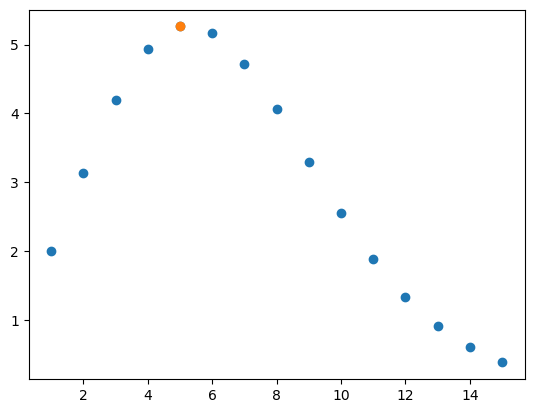

In [8]:
def hiperkula_1(n):
    return (math.pi**(n/2)/math.gamma(n/2+1))

pary = {(hiperkula_1(n), n) for n in range(100)}
objetosc, wymiary = max(pary, key=lambda k: k[0])

x = np.arange(1, 16, 1)
y = np.vectorize(hiperkula_1)(x)

plt.plot(x, y, 'o')
plt.plot(wymiary, hiperkula_1(wymiary), 'o')
# plt.plot()

### Zadanie 2

Napisz funkcję, która dla zadanej listy słów narysuje wykres słupkowy, przekazując do odpowiedniej funkcji rysującej dodatkowe argumenty nazwane, aby można było zmienić przykładowo kolor lub szerokość słupków. Wykorzystaj szablon funkcji poniżej. Funkcja powinna rozmieścić słowa tak, żeby najczęstsze było u góry i im rzadsze słowo, tym niżej. W przypadku remisów kolejność jest dowolna. Oś X powinna być podpisana liczbami naturalnymi.

In [118]:
# from collections import Counter

def rysuj_listę_słów(lista_słów, **kwds):
    # częstotliwość = Counter(lista_słów)
    częstotliwość = {słowo: 0 for słowo in set(lista_słów)}
    for słowo in lista_słów:
        częstotliwość[słowo] += 1
    częstotliwość = sorted(częstotliwość.items(), key=lambda k: k[1])
    fig, ax = plt.subplots()
    x, y = zip(*częstotliwość)
    plt.barh(x, y, **kwds)
    ax.xaxis.set_major_locator(locator=plt.MultipleLocator(1))

Przetestuj swój kod na przykładzie poniżej. Spróbuj odtworzyć następujący wykres.

![wykres.png](http://prac.im.pwr.edu.pl/~giniew/słupkowy2.png)

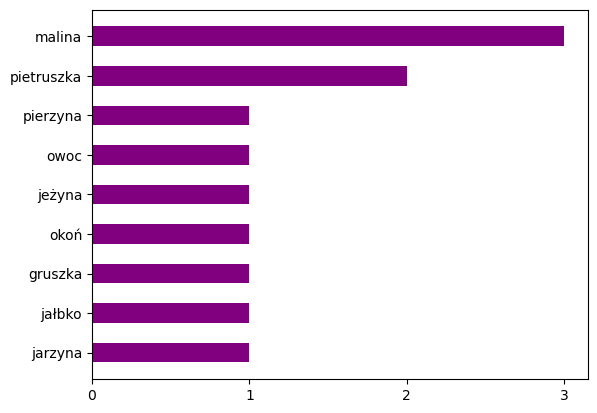

In [120]:
lista = """
jałbko malina jeżyna
malina gruszka pietruszka
owoc jarzyna pierzyna
okoń pietruszka malina
""".split()

rysuj_listę_słów(lista, height=0.5, color="#800080")

### Zadanie 3

Przeanalizuj kod znajdujący się w komórce poniżej.

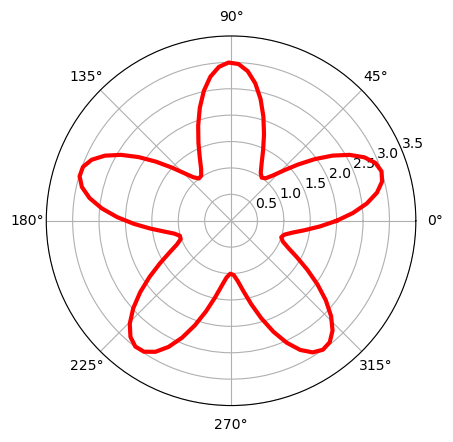

In [14]:
theta = np.linspace(0, 2*math.pi, 100)
r = 2 + np.sin(10/2*theta)

wykres = plt.subplot(111, projection='polar')
wykres.plot(theta, r, color='r', linewidth=3)
wykres.set_rmax(3.5)
wykres.grid(True)

Dostosuj kod tak, aby uzyskać wykres [spirali archimedejskiej](http://mathworld.wolfram.com/ArchimedeanSpiral.html). Rozwiązanie umieść w komórce poniżej.

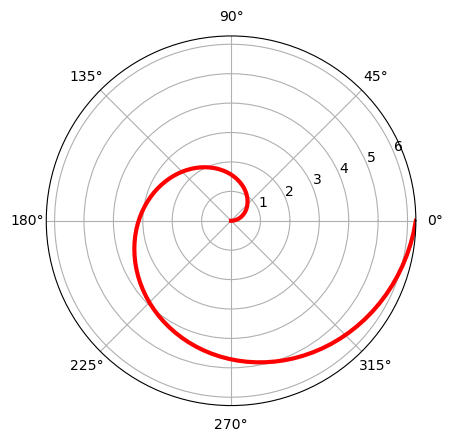

In [18]:
theta = np.linspace(0, 2*math.pi, 100)
r = theta

wykres = plt.subplot(111, projection='polar')
wykres.plot(theta, r, color='r', linewidth=3)
wykres.set_rmax(2*math.pi)
wykres.grid(True)

### Zadanie 4

Spróbuj odtworzyć następujący wykres.

![wykres.png](http://prac.im.pwr.edu.pl/~giniew/wykres_sin_cos.png)

Kod umieść w komórce poniżej.

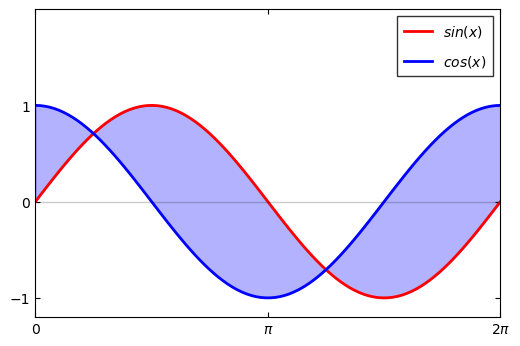

In [49]:
x = np.linspace(0, 2*math.pi, 100)
sin = np.sin(x)
cos = np.cos(x)

# fig, ax = plt.subplots(figsize=(6, 4))
fig = plt.figure(figsize=(6, 4))
ax = plt.axes()
plt.plot(x, sin, color='r', linewidth=2, label=r"$sin(x)$")
plt.plot(x, cos, color='b', linewidth=2, label=r"$cos(x)$")
plt.fill_between(x, sin, cos, color='b', alpha=0.3)
plt.axhline(0, color='black', alpha=0.2, linewidth=1)
plt.ylim(-1.2, 2)
plt.xlim(0, 2*math.pi)
plt.legend(loc="upper right", edgecolor="black", fancybox=False, labelspacing=1, borderpad=0.5)
ax.set_yticks([-1, 0, 1])
ax.set_xticks([0, math.pi, 2*math.pi], ["0", r"$\pi$", r"$2\pi$"])
ax.tick_params(axis="both", direction="in")
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.show()

### Zadanie 5

Dla ustalonych $\alpha>0$ i $\beta>0$ definiujemy funkcję $f$ na dodatniej półprostej $(0,+\infty)$ jako
$$f(x)=\frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x},$$
gdzie $\Gamma(\alpha)=\int_{0}^{+\infty}t^{\alpha-1}e^{-t}\mathrm{d}t$ jest wartością tak zwanej funkcji gamma Eulera. Funkcja gamma zaimplementowana jest w module `math` jako [gamma](https://docs.python.org/3/library/math.html#math.gamma), nie jest ona jednak zaimplementowana w bibliotece NumPy.

Na jednym rysunku narysuj wykresy funkcji $f$ dla podanych w tabeli wartości parametrów $\alpha$ i $\beta$.

| Kolor | $\alpha$ | $\beta$  |
|-------|----------|----------|
|<a style='color: red;'> czerwony </a>|<a style='color: red;'> 0.25 </a>|<a style='color: red;'> 0.25 </a> |
|<a style='color: blue;'> niebieski </a> |<a style='color: blue;'> 0.5 </a>|<a style='color: blue;'> 2 </a> |
|<a style='color: green;'> zielony </a> |<a style='color: green;'> 0.75 </a>|<a style='color: green;'> 5 </a> |
|<a style='color: purple;'> fioletowy </a> |<a style='color: purple;'> 2 </a>|<a style='color: purple;'> 2 </a> |
|<a style='color: teal;'> morski </a> |<a style='color: teal;'> 3 </a>|<a style='color: teal;'> 2 </a> |
|<a style='color: orange;'> pomarańczowy </a>|<a style='color: orange;'> 5 </a>|<a style='color: orange;'> 5 </a> |

Wymagania dotyczące wykresów:

1. Kolory wykresów mają się zgadać z podanymi w tabeli;
2. Osie powinny być <b>podpisane</b> (symbolami $x$ i $y$); 
3. <b>Zakres wartości</b> na osi $Ox$ to $[-0.2,4]$, a zakres wartości na osi $Oy$ to $[0,3]$;
4. Należy na rysunku umieścić <b>legendę</b> zawierającą etykiety wszystkich narysowanych wykresów, umieszczoną w prawym górnym rogu;
5. Na rysunku należy zaznaczyć oś $x=0$ czarną linią przerywaną;
6. Na rysunku należy dodać siatkę;
7. Rysunek powinien mieć tytuł "Wykresy funkcji $f$".

Rozwiązanie umieść w komórce poniżej.

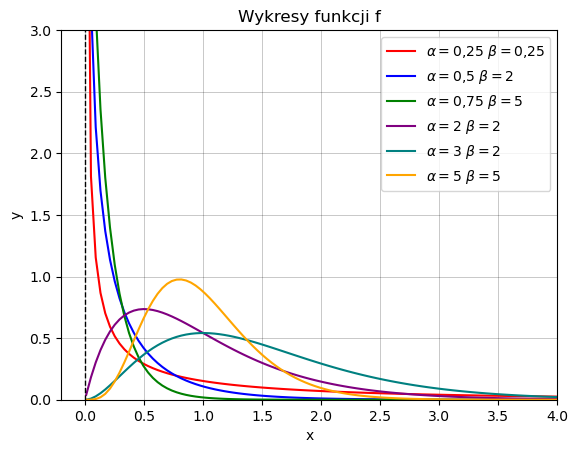

In [141]:
def f(x, alfa, beta):
    return (beta**alfa)/math.gamma(alfa)*x**(alfa-1)*math.e**(-beta*x)

x = np.linspace(0.01, 4, 100)
f1 = np.vectorize(lambda a: f(a, 0.25, 0.25))(x)
f2 = np.vectorize(lambda a: f(a, 0.5, 2))(x)
f3 = np.vectorize(lambda a: f(a, 0.75, 5))(x)
f4 = np.vectorize(lambda a: f(a, 2, 2))(x)
f5 = np.vectorize(lambda a: f(a, 3, 2))(x)
f6 = np.vectorize(lambda a: f(a, 5, 5))(x)

wykres = plt.subplot()
wykres.set_title("Wykresy funkcji f")
wykres.plot(x, f1, color="r", label=r"$\alpha=0{,}25~\beta=0{,}25$")
wykres.plot(x, f2, color="b", label=r"$\alpha=0{,}5~\beta=2$")
wykres.plot(x, f3, color="g", label=r"$\alpha=0{,}75~\beta=5$")
wykres.plot(x, f4, color="purple", label=r"$\alpha=2~\beta=2$")
wykres.plot(x, f5, color="teal", label=r"$\alpha=3~\beta=2$")
wykres.plot(x, f6, color="orange", label=r"$\alpha=5~\beta=5$")
wykres.set_xlim(-0.2, 4)
wykres.set_ylim(0, 3)
wykres.set_xlabel("x")
wykres.set_ylabel("y")
wykres.legend(loc="upper right")
wykres.axvline(0, color='black', linewidth=1, linestyle='--')
wykres.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)

### Zadanie 6

Zapoznaj się z informacją o mapach kolorów w [dokumentacji Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) oraz z kodem poniżej. Sprawdź dokumentację wszystkich funkcji z biblioteki Matplotlib użytych poniżej i zobacz, co oznaczają ich argumenty.

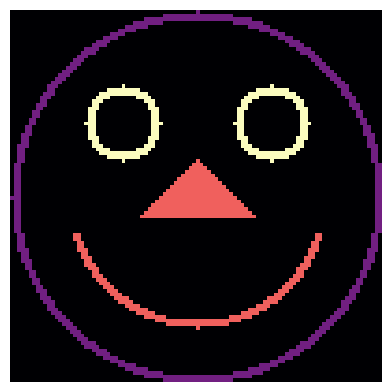

In [273]:
M = np.zeros((100, 100), 'u1')

for i in range(100):
    for j in range(100):
        if 48**2 <= (i-50)**2 + (j-50)**2 <= 50**2:
            M[i,j] = 1
        elif 8**2 <= (i-30)**2 + (j-30)**2 <= 10**2:
            M[i,j] = 3
        elif 8**2 <= (i-30)**2 + (j-70)**2 <= 10**2:
            M[i,j] = 3
        elif max(j-10, 90-j) <= i <= 55:
            M[i, j] = 2
        elif 33**2 <= (i-50)**2 + (j-50)**2 <= 35**2 and i >= 60:
            M[i,j] = 2
            
plt.matshow(M)
plt.set_cmap('magma')
plt.axis('off')
plt.show()

Wykorzystując tę wiedzę, przygotuj rysunek choinki z ozdobami zaprojektowanymi według swojego pomysłu. Możesz również umieścić pod nią prezenty.

Rozwiązanie umieść w komórce poniżej.

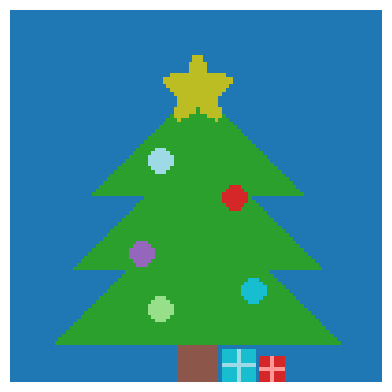

In [134]:
M = np.zeros((100, 100), 'u1')

# https://stackoverflow.com/a/26757297
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

for y in range(100):
    for x in range(100):
        if x==y==0:
            M[y,x] = 0
        # Pień
        if y >= 90 and 45 <= x <= 55:
            M[y,x] = 10
        # Liście
        if 70 <= y < 90 and abs(x - 50) < y - 50:
            M[y,x] = 4
        if 50 <= y < 70 and abs(x - 50) < y - 35:
            M[y,x] = 4
        if 20 <= y < 50 and abs(x - 50) < y - 20:
            M[y,x] = 4
        # Gwiazdka
        odległość, kąt = cart2pol(x-50, y-21)
        if odległość < 10 - 5*(abs((kąt - (2*math.pi/20)) % (2*math.pi/5) - (2*math.pi/10)))/(2*math.pi/10):
            M[y,x] = 16
        bombki = [((40, 40), 19), ((60, 50), 6), ((35, 65), 8), ((65, 75), 18), ((40, 80), 5)]
        for (bx, by), kolor in bombki:
            if math.sqrt((x-bx)**2 + (y-by)**2) < 3.5:
                M[y,x] = kolor
        if 57 <= x <= 65 and y >= 91:
            M[y,x] = 18
            if x == 61 or y == 95:
                M[y,x] = 19
        if 67 <= x <= 73 and y >= 93:
            M[y,x] = 6
            if x == 70 or y == 96:
                M[y,x] = 7
             
plt.matshow(M)
plt.set_cmap('tab20')
plt.axis('off')
plt.show()

<div style="text-align: right"> Powodzenia!<br><i>Zespół kursu Wstęp do programowania</i></div>